In [96]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [97]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [98]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [99]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [100]:
# reflect an existing database into a new model

base = automap_base()


# reflect the tables

base.prepare(engine, reflect=True)

# inspector = inspect(engine)

# inspector.get_table_names()

In [101]:
# View all of the classes that automap found

base.classes.keys()

['measurement', 'station']

In [102]:
# Save references to each table
# Demographics = Base.classes.demographics

Station = base.classes.station

Measurement = base.classes.measurement

In [103]:
# Create our session (link) from Python to the DB

session = Session(engine)


# Exploratory Precipitation Analysis

In [104]:
# Find the most recent date in the data set.

initial_date = session.query(func.max(Measurement.date)).all()

initial_date




[('2017-08-23')]

In [105]:
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

print(query_date)

2016-08-23


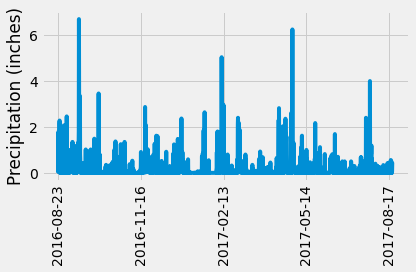

In [129]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Note you do not pass in the date as a variable to your query.

precip_data = session.query(func.strftime("%Y-%m-%d", Measurement.date), Measurement.prcp).\
    filter(func.strftime("%Y-%m-%d", Measurement.date) >= query_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column

precip_df = pd.DataFrame(precip_data, columns = ['date', 'precipitation'])

precip_df.set_index('date', inplace=True)

precip_df

# Sort the dataframe by date


precip_df = precip_df.sort_values(by='date')
precip_df

precip_df = precip_df.dropna()
precip_df

# Use Pandas Plotting with Matplotlib to plot the data

precip_df.plot(x_compat = True, xlabel = "", ylabel = "Precipitation (inches)", legend = False)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("precip_plot.png")

plt.show()

        

        # the plot gets saved to 'output.png'
        #plt.savefig('output.png')








In [130]:
# Use Pandas to print the summary statistics for the precipitation data

precip_df.describe(include='all').round(2)


,precipitation
count,2021.00
mean,0.18
std,0.46
min,0.00
25%,0.00
50%,0.02
75%,0.13
max,6.70


# Exploratory Station Analysis

In [131]:
# Design a query to calculate the total number stations in the dataset

session.query(Station.station).distinct().count()



9

In [132]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)


session.query(Station.station, func.count(Station.station)).group_by(Station.station).\
     filter(Measurement.station == Station.station).order_by(func.count(Station.station).desc()).all()                                
                  
                                
# List the stations and the counts in descending order.

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [133]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

# Most active station = 'USC00519281'

maxtemp = session.query(func.max(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

maxtemp


[(85.0)]

In [134]:
mintemp = session.query(func.min(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

mintemp


[(54.0)]

In [135]:
avgtemp = session.query(func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

avgtemp


[(71.66378066378067)]

In [136]:
# Using the most active station id

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

station_data = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date >= '2016-8-23').\
    filter(Measurement.station == 'USC00519281').all()

station_data


[('2017-01-01', 72.0),
 ('2017-01-02', 70.0),
 ('2017-01-03', 64.0),
 ('2017-01-04', 63.0),
 ('2017-01-05', 63.0),
 ('2017-01-06', 62.0),
 ('2017-01-07', 70.0),
 ('2017-01-08', 70.0),
 ('2017-01-09', 62.0),
 ('2017-01-10', 62.0),
 ('2017-01-11', 63.0),
 ('2017-01-12', 65.0),
 ('2017-01-13', 69.0),
 ('2017-01-14', 77.0),
 ('2017-01-15', 70.0),
 ('2017-01-16', 74.0),
 ('2017-01-17', 69.0),
 ('2017-01-18', 72.0),
 ('2017-01-19', 71.0),
 ('2017-01-20', 69.0),
 ('2017-01-21', 71.0),
 ('2017-01-22', 71.0),
 ('2017-01-23', 72.0),
 ('2017-01-24', 72.0),
 ('2017-01-25', 69.0),
 ('2017-01-26', 70.0),
 ('2017-01-27', 66.0),
 ('2017-01-28', 65.0),
 ('2017-01-29', 69.0),
 ('2017-01-30', 68.0),
 ('2017-01-31', 68.0),
 ('2017-02-01', 68.0),
 ('2017-02-02', 59.0),
 ('2017-02-03', 60.0),
 ('2017-02-04', 70.0),
 ('2017-02-05', 73.0),
 ('2017-02-06', 75.0),
 ('2017-02-07', 64.0),
 ('2017-02-08', 59.0),
 ('2017-02-09', 59.0),
 ('2017-02-10', 62.0),
 ('2017-02-11', 68.0),
 ('2017-02-12', 70.0),
 ('2017-02-

In [137]:
station_data_df = pd.DataFrame(station_data, columns = ['Station', 'Temperature'])
station_data_df


,Station,Temperature
0,2017-01-01,72.0
1,2017-01-02,70.0
2,2017-01-03,64.0
3,2017-01-04,63.0
4,2017-01-05,63.0
...,...,...
216,2017-08-14,77.0
217,2017-08-15,77.0
218,2017-08-16,76.0
219,2017-08-17,76.0


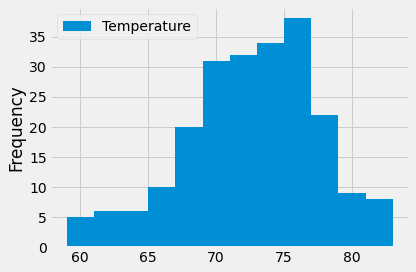

In [138]:
station_data_df.plot.hist(bins = 12)
plt.tight_layout()
plt.savefig("station_hist.png")
plt.show()

# Close session

In [139]:
# Close Session
session.close()